# Stochastic Lattice: Hip-implant

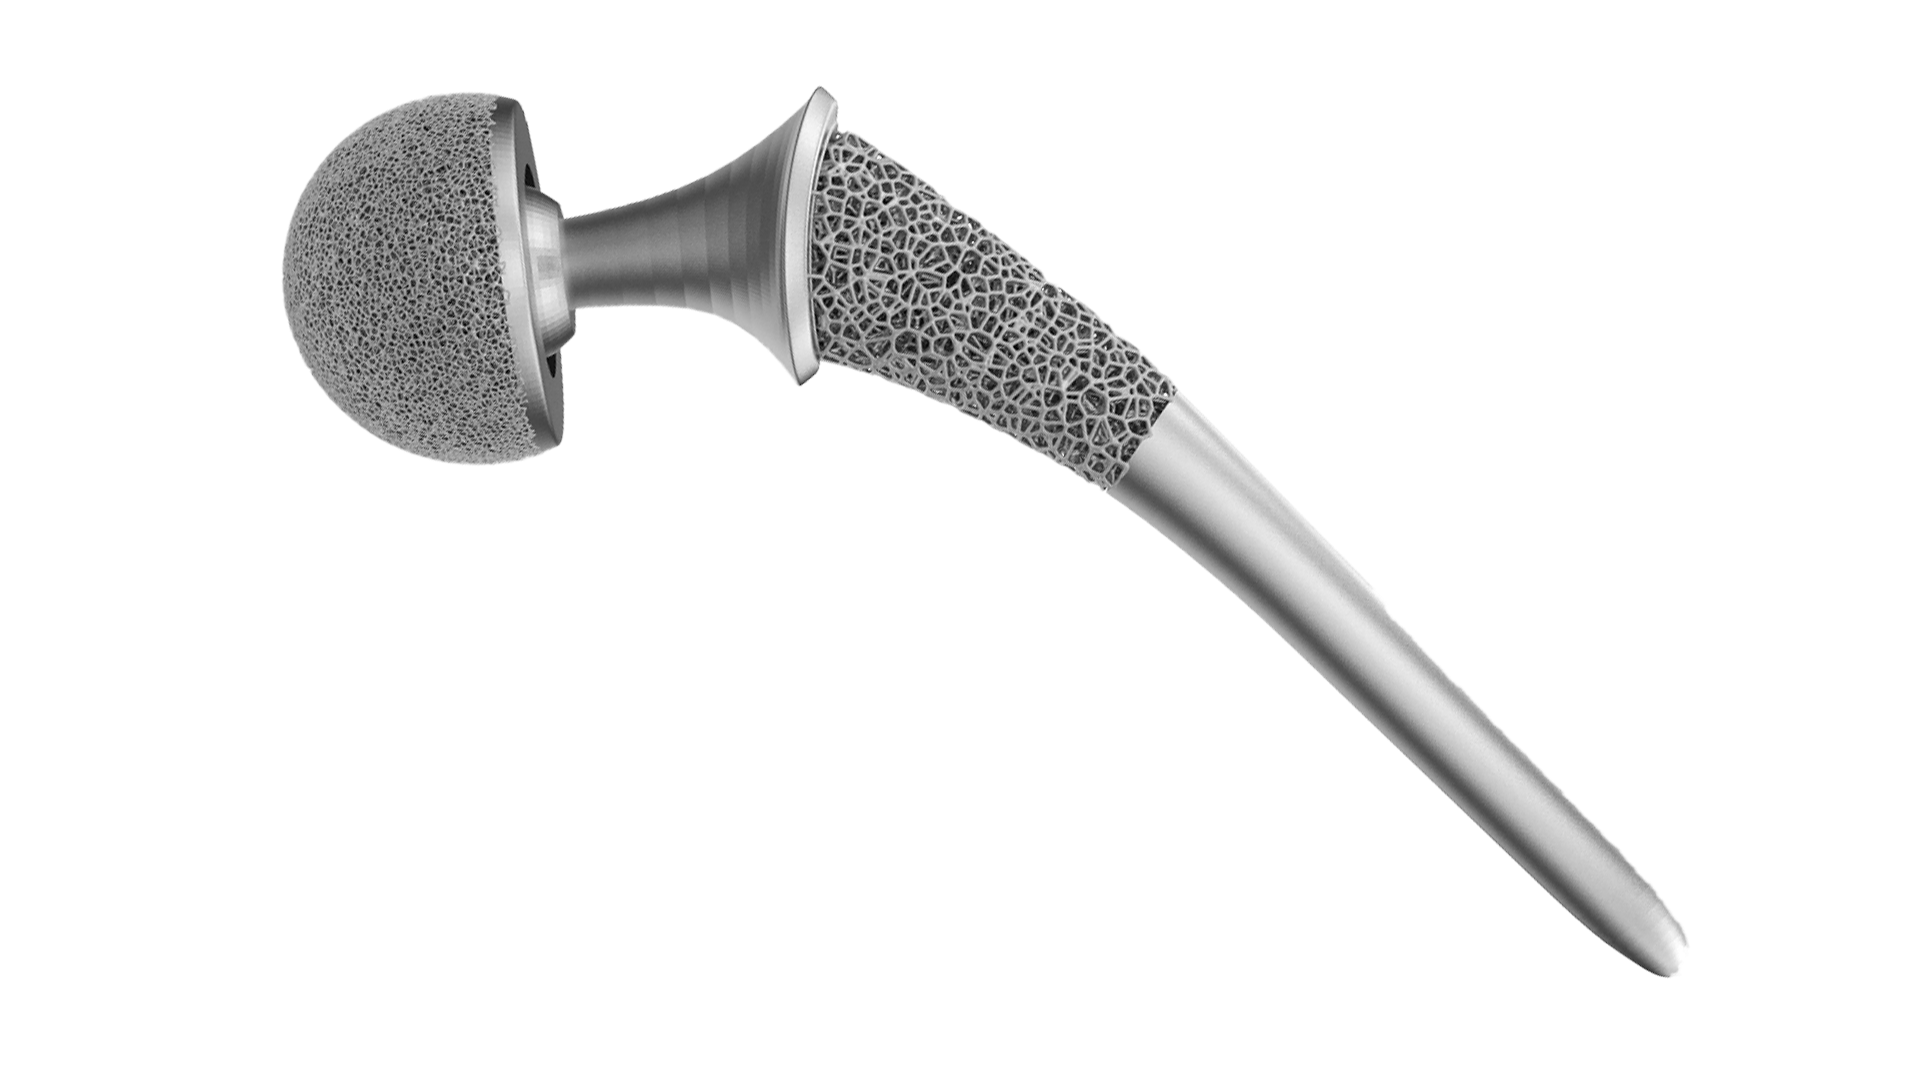

In [1]:
# import library and assign your token
import genysis
t = "eyJhbGciOiJIU.U892JiUy"

Welcome to GENYSIS


In [3]:
# upload local files to genysis server
genysis.upload(src="models/bipolar_head1.obj",dest="bipolar_head1.obj",token=t)
genysis.upload(src="models/bipolar_head2.obj",dest="bipolar_head2.obj",token=t)

('uploading file size:', 0.535, 'MB')
[==================================================]100%
successfully uploaded models/bipolar_head1.obj as bipolar_head1.obj
('uploading file size:', 1.247, 'MB')
[==================================================]100%
successfully uploaded models/bipolar_head2.obj as bipolar_head2.obj


{u'message': u'bipolar_head2.obj uploaded to test@test.com/bipolar_head2.obj'}

In [4]:
# tool to visualize uploaded obj files (use mouse left button to spin the view)
genysis.visualize("bipolar_head1.obj",t,True,300,300)
genysis.visualize("bipolar_head2.obj",t,True,300,300)

https://studiobitonti.appspot.com/apps/visualize?name=bipolar_head1.obj&t=eyJhbGciOiJIU.U892JiUy


https://studiobitonti.appspot.com/apps/visualize?name=bipolar_head2.obj&t=eyJhbGciOiJIU.U892JiUy


'https://studiobitonti.appspot.com/apps/visualize?name=bipolar_head2.obj&t=eyJhbGciOiJIU.U892JiUy'

In [5]:
# use boolean intersection to create region to apply lattice
genysis.boolean(
    input1= "bipolar_head1.obj",
    input2= "bipolar_head2.obj",
    output= "bipolar_head_lattice_region.obj",
    operation="intersection",
    token=t)

# use boolean difference to create the solid part to be joined together with lattice
genysis.boolean(
    input1= "bipolar_head1.obj",
    input2= "bipolar_head2.obj",
    output= "bipolar_head_solid_region.obj",
    operation="difference",
    token=t)

# visualize the boolean results
genysis.visualize("bipolar_head_lattice_region.obj",t,True,300,300)
genysis.visualize("bipolar_head_solid_region.obj",t,True,300,300)

('request: ', '{"input2": "bipolar_head2.obj", "engine": "carve", "input1": "bipolar_head1.obj", "t": "eyJhbGciOiJIU.U892JiUy", "output": "bipolar_head_lattice_region.obj", "operation": "intersection"}')
('response: ', u'["bipolar_head_lattice_region.obj"]')
('request: ', '{"input2": "bipolar_head2.obj", "engine": "carve", "input1": "bipolar_head1.obj", "t": "eyJhbGciOiJIU.U892JiUy", "output": "bipolar_head_solid_region.obj", "operation": "difference"}')
('response: ', u'["bipolar_head_solid_region.obj"]')
https://studiobitonti.appspot.com/apps/visualize?name=bipolar_head_lattice_region.obj&t=eyJhbGciOiJIU.U892JiUy


https://studiobitonti.appspot.com/apps/visualize?name=bipolar_head_solid_region.obj&t=eyJhbGciOiJIU.U892JiUy


'https://studiobitonti.appspot.com/apps/visualize?name=bipolar_head_solid_region.obj&t=eyJhbGciOiJIU.U892JiUy'

In [6]:
# generate the stochastic lattice as obj lines(this is a large part and it might take a min or two...)
lattice = genysis.volumeLattice()
lattice.setVolume("bipolar_head_lattice_region.obj")
lattice.setPoreSize(1.0)
lattice.setOutput("bipolar_head_lattice_lines.obj")
lattice.runStochastic(t)

# to visualize the file, click on the link of open a separate window (it could take 1~2mins to load due to large size)
print ("Click on URL to visualize")
genysis.visualize("bipolar_head_lattice_lines.obj",t)

('request: ', '{"volume": "bipolar_head_lattice_region.obj", "poreSize": 1.0, "t": "eyJhbGciOiJIU.U892JiUy", "filename": "bipolar_head_lattice_lines.obj"}')
('response: ', u'["bipolar_head_lattice_lines.obj"]')
Click on URL to visualize
https://studiobitonti.appspot.com/apps/visualize?name=bipolar_head_lattice_lines.obj&t=eyJhbGciOiJIU.U892JiUy


'https://studiobitonti.appspot.com/apps/visualize?name=bipolar_head_lattice_lines.obj&t=eyJhbGciOiJIU.U892JiUy'

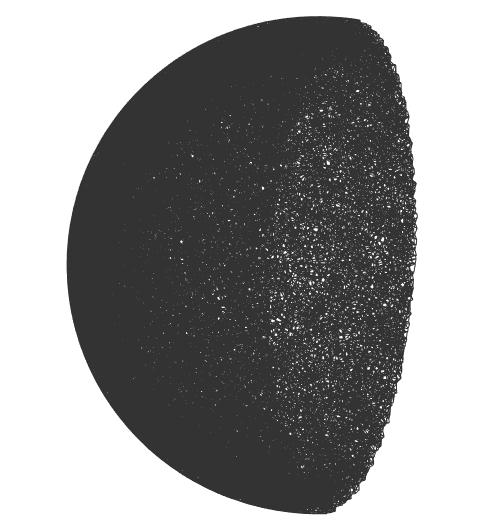

In [7]:
# mesh the obj lines at thickness of 0.2 (this is a large part and it might take a min or two...)
genysis.marchingCube(
    lines="bipolar_head_lattice_lines.obj",
    resolution=300,
    memberThickness=0.2,
    filename="bipolar_head_lattice_meshed.obj",
    token=t)

# to visualize the file, click on the link of open a separate window (it could take 1~2mins to load due to large file size)
print ("Click on URL to visualize")
genysis.visualize("bipolar_head_lattice_meshed.obj",t)

('request: ', '{"resolution": 300, "memberThickness": 0.2, "lines": "bipolar_head_lattice_lines.obj", "t": "eyJhbGciOiJIU.U892JiUy", "filename": "bipolar_head_lattice_meshed.obj"}')
('response: ', u'["bipolar_head_lattice_meshed.obj"]')
Click on URL to visualize
https://studiobitonti.appspot.com/apps/visualize?name=bipolar_head_lattice_meshed.obj&t=eyJhbGciOiJIU.U892JiUy


'https://studiobitonti.appspot.com/apps/visualize?name=bipolar_head_lattice_meshed.obj&t=eyJhbGciOiJIU.U892JiUy'

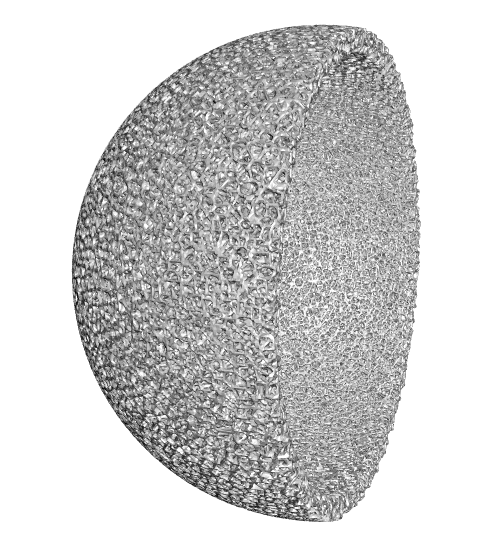

In [8]:
# merge the lattice and solid part of bipolar head into a single geometry using boolea union
genysis.boolean(
    input1= "bipolar_head_solid_region.obj",
    input2= "bipolar_head_lattice_meshed.obj",
    output= "bipolar_head_final.obj",
    operation="union",
    token=t)

# to visualize the file, click on the link of open a separate window (it could take 1~2mins to load due to large file size)
print ("Click on URL to visualize")
genysis.visualize("bipolar_head_final.obj",t)

('request: ', '{"input2": "bipolar_head_lattice_meshed.obj", "engine": "carve", "input1": "bipolar_head_solid_region.obj", "t": "eyJhbGciOiJIU.U892JiUy", "output": "bipolar_head_final.obj", "operation": "union"}')
('response: ', u'["bipolar_head_final.obj"]')
Click on URL to visualize
https://studiobitonti.appspot.com/apps/visualize?name=bipolar_head_final.obj&t=eyJhbGciOiJIU.U892JiUy


'https://studiobitonti.appspot.com/apps/visualize?name=bipolar_head_final.obj&t=eyJhbGciOiJIU.U892JiUy'

In [14]:
# download the final geometry to local drive
genysis.download(src="bipolar_head_final.obj",dest="bipolar_head_final.obj",token=t)

[==================================================]100%
successfully downloaded to bipolar_head_final.obj



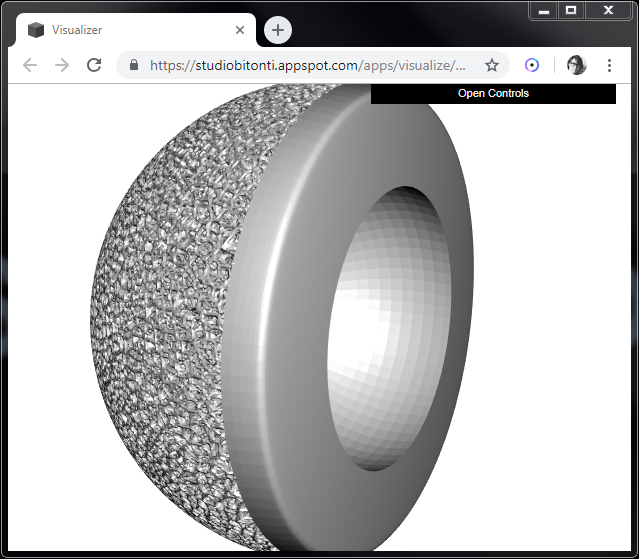